# Laboration deep learning AI21

### 0. EDA and file management(*)

a)

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os, shutil, cv2, random

b) and c)

In [2]:
current_dir = os.path.abspath("")

# folder names
folders = ["experiment_small_data", "experiment_tiny_data", "original_data"]
sub_folders = ["test", "train", "val"]

# create folders
for folder in folders:
    try:
        os.mkdir(f"{current_dir}/{folder}")
        
        # create subfolders
        if folder != folders[-1]:
            for sub_folder in sub_folders:
                os.mkdir(f"{current_dir}/{folder}/{sub_folder}")
    except FileExistsError as err:
        print(err)
        
# move data folders to original_data
shutil.move(f"{current_dir}/train", f"{current_dir}/original_data")
shutil.move(f"{current_dir}/test", f"{current_dir}/original_data")

'c:\\Users\\chris\\Documents\\GitHub\\Deep_learning_Christopher_Seander\\Lab/original_data\\test'

In [3]:
# function to plot images
def plot_samples(images, labels, n_rows = 2, n_cols = 5, size = (14, 6), title = ""):
    fig, axes = plt.subplots(n_rows, n_cols, figsize = size)
    fig.suptitle(title, fontsize = 20)

    # plot each image
    for i, ax in enumerate(axes.flatten()):
        ax.imshow(images[i])
        ax.set_title(labels[i])
        ax.axis("off")

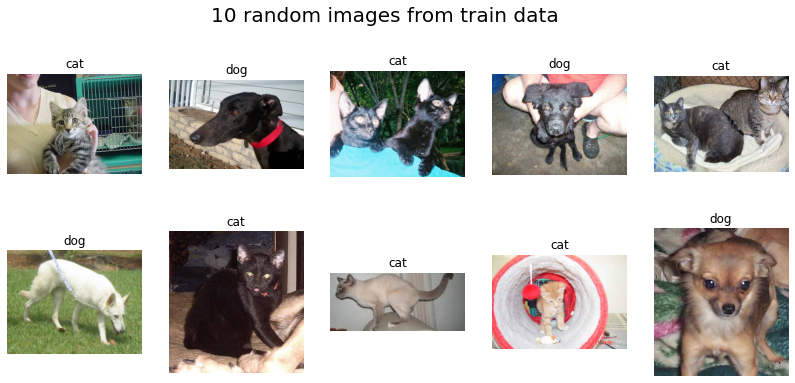

In [4]:
train_data_dir = os.path.abspath(f"{current_dir}/original_data/train/train")

# get list of all train data images
train_images = os.listdir(train_data_dir)

# choose 10 random images
random_images_indices = random.sample(range(0, len(train_images)), 10)

# plot 10 random images
images = []
labels = []
for i in range(10):
    images.append(plt.imread(f"{train_data_dir}/{train_images[random_images_indices[i]]}"))
    labels.append(train_images[random_images_indices[i]].split('.')[0])

plot_samples(images, labels, title = "10 random images from train data")

d)

In [5]:
# to make sure there will be no replacement
not_yet_picked_samples = train_images.copy()

def pick_random_samples(samples):
    random_samples = int(samples / 2)
    
    # pick random cat sample indices
    split_cat_indices = random.sample(range(0, int(len(not_yet_picked_samples)/2)), random_samples)
    split_cat_indices.sort(reverse = True)
    
    # random cat samples
    cat_samples = [not_yet_picked_samples[i] for i in split_cat_indices]
    
    # remove cat samples from not yet picked samples
    for to_remove in split_cat_indices:
        not_yet_picked_samples.remove(not_yet_picked_samples[to_remove])
    
    # pick random dog sample indices
    split_dog_indices = random.sample(range(int(len(not_yet_picked_samples)/2), len(not_yet_picked_samples)), random_samples)
    split_dog_indices.sort(reverse = True)
    
    # random dog samples
    dog_samples = [not_yet_picked_samples[i] for i in split_dog_indices]
    
    # remove dog samples from not yet picked samples
    for to_remove in split_dog_indices:
        not_yet_picked_samples.remove(not_yet_picked_samples[to_remove])
    
    return cat_samples + dog_samples

In [6]:
# train|val|test sizes
small = [1600, 400, 500]
tiny =  [160, 40, 50]

# destination folder name
folders = ["train", "val", "test"]

# function to copy set amount of samples to specified location
def copy_images(samples, location):
    for sample_size, folder in zip(samples, folders):
        picked_samples = pick_random_samples(sample_size)
        
        # copy each image
        for image in picked_samples:
            shutil.copy(f"{train_data_dir}/{image}", f"{location}/{folder}")  

copy images to experiment_small_data

In [7]:
copy_images(small, f"{current_dir}/experiment_small_data")

copy images to experiment_tiny_data

In [8]:
copy_images(tiny, f"{current_dir}/experiment_tiny_data")

e)

In [9]:
def load_image_dataset(path):
    # list of all images
    data = os.listdir(os.path.abspath(path))
    
    # randomize order
    random.shuffle(data)

    dataset = []
    labels = []
    
    # load each image, resize and add to dataset
    for image_file in data:
        image = plt.imread(f"{path}/{image_file}")

        dataset.append(image)
        labels.append(image_file.split('.')[0])

    # one hot encode labels: 1 for cat, 0 for dog
    labels = pd.get_dummies(pd.DataFrame(labels))
    labels = labels["0_cat"].to_numpy()

    # return numpy arrays
    return dataset, labels

In [10]:
small_path = os.path.abspath(f"{current_dir}/experiment_small_data")
tiny_path = os.path.abspath(f"{current_dir}/experiment_tiny_data")

In [11]:
# small dataset
small_train = load_image_dataset(f"{small_path}/train")
small_X_train, small_y_train = small_train[0], small_train[1]

small_test = load_image_dataset(f"{small_path}/test")
small_X_test, small_y_test = small_test[0], small_test[1]

small_val = load_image_dataset(f"{small_path}/val")
small_X_val, small_y_val = small_val[0], small_val[1]

# tiny dataset
tiny_train = load_image_dataset(f"{tiny_path}/train")
tiny_X_train, tiny_y_train = tiny_train[0], tiny_train[1]

tiny_test = load_image_dataset(f"{tiny_path}/test")
tiny_X_test, tiny_y_test = tiny_test[0], tiny_test[1]

tiny_val = load_image_dataset(f"{tiny_path}/val")
tiny_X_val, tiny_y_val = tiny_val[0], tiny_val[1]

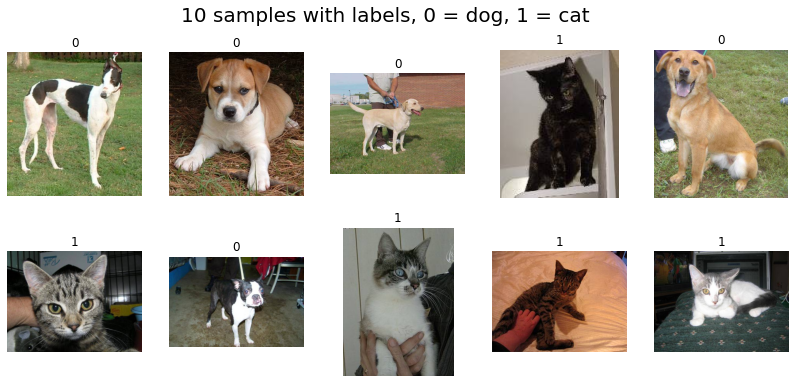

In [12]:
plot_samples(tiny_X_val, tiny_y_val, title = "10 samples with labels, 0 = dog, 1 = cat")

The one-hot encoded labels seem to be correct.

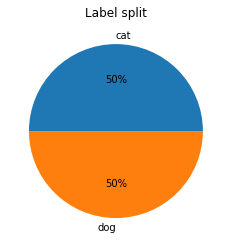

In [13]:
# concatenate array of all labels
label_split = np.concatenate([small_y_train, small_y_test, small_y_val, tiny_y_train, tiny_y_test, tiny_y_val])

# plot pie chart to see label balance
fig = plt.figure(facecolor = "w")
ax = plt.axes()
ax.pie(x = np.unique(label_split, return_counts = True)[1], labels = ["cat", "dog"], autopct = "%.f%%")
ax.set_title("Label split");

Line chart for label values in order to show randomization

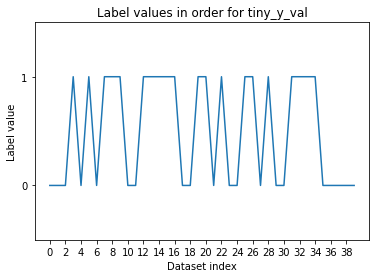

In [14]:
fig = plt.figure()
ax = plt.axes()
ax.plot(tiny_y_val)
ax.set_ylim(-0.5, 1.5)
ax.set_title("Label values in order for tiny_y_val")
ax.set_xlabel("Dataset index")
ax.set_ylabel("Label value");
ax.set_yticks([0, 1])
ax.set_xticks(range(0, len(tiny_y_val), 2));

## 1. Image processing (*)
a), b) and c)

extracting the x and y values from each image

In [15]:
def dimensions(dataset):
    x, y = [], []
    for image in dataset:
        x.append(image.shape[0])
        y.append(image.shape[1])
    return x, y

Plot x and y values from images

In [16]:
def plot_dimensions(x, y):
    fig = plt.figure();
    ax = sns.jointplot(x = x, y = y)
    plt.suptitle(f"x and y values for images in dataset", fontsize = 16)
    plt.subplots_adjust(top = .94)

Function to resize images and return as numpy array

In [17]:
def resize_images(images, size):
    resized_images = []
    
    # resize each image
    for image in images:
        resized_image = cv2.resize(image, size)
        resized_images.append(resized_image)
    
    # returns as numpy array
    return np.array(resized_images) /255

Plot image dimensions

In [18]:
def plot_mean(dataset):
    # get x and y values
    x, y = dimensions(dataset)
    
    # plot x and y values
    plot_dimensions(x, y)
    
    # create dataframe with x and y values
    df_dimensions = pd.DataFrame([x, y]).T
    df_dimensions.columns = ["x", "y"]
    
    # get new size by taking mean values 
    mean = (int(df_dimensions["x"].mean()), int(df_dimensions["y"].mean()))
    print(f"Mean x and y: {mean}")

Small dataset

Mean x and y: (358, 405)


<Figure size 432x288 with 0 Axes>

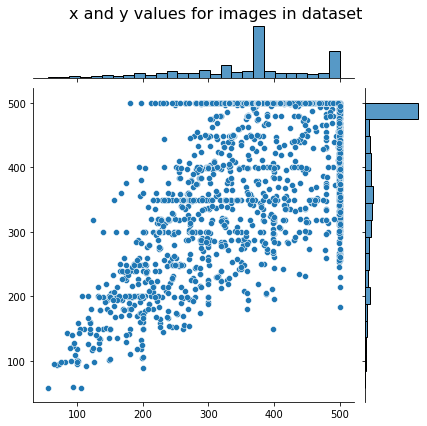

In [19]:
plot_mean(small_X_train + small_X_test + small_X_val)

Tiny dataset

Mean x and y: (356, 397)


<Figure size 432x288 with 0 Axes>

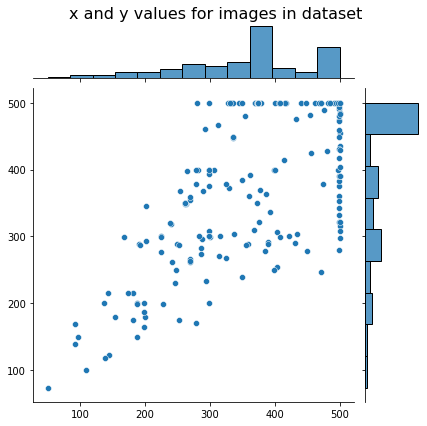

In [20]:
plot_mean(tiny_X_train + tiny_X_test + tiny_X_val)

Resize small and tiny datasets

In [21]:
# starting with 128, 128
new_size = (128, 128)

small_X_train = resize_images(small_X_train, new_size)
small_X_test = resize_images(small_X_test, new_size)
small_X_val = resize_images(small_X_val, new_size)

tiny_X_train = resize_images(tiny_X_train, new_size)
tiny_X_test = resize_images(tiny_X_test, new_size)
tiny_X_val = resize_images(tiny_X_val, new_size)

print(f"small_X_train shape: {small_X_train.shape}")

small_X_train shape: (1600, 128, 128, 3)


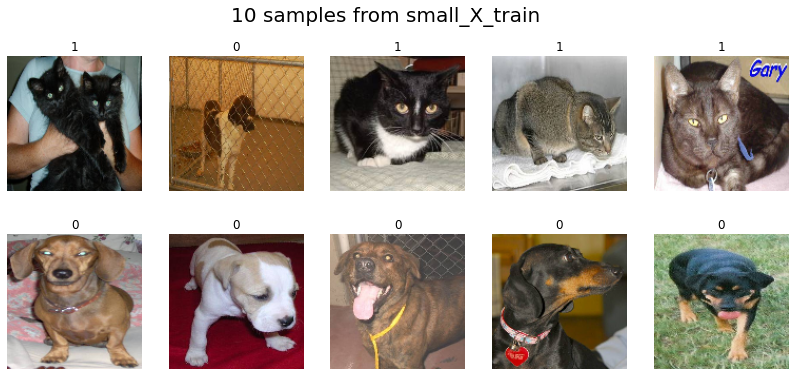

In [22]:
plot_samples(small_X_train, small_y_train, title = "10 samples from small_X_train")

In [23]:
tiny_X_test.shape

(50, 128, 128, 3)

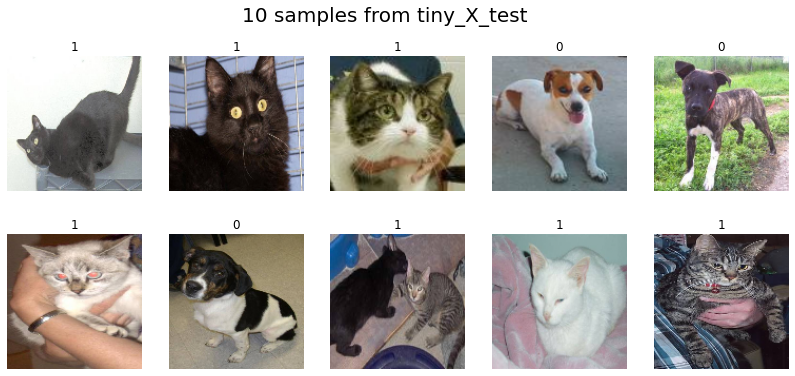

In [24]:
plot_samples(tiny_X_test, tiny_y_test, title = "10 samples from tiny_X_test")

d)

### Data augmentation
Data augmentation is needed when it's expensive (most of the time) to acquire a large amount of data, you add slightly augmented images from your dataset to increase the number of samples in the dataset.

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

Function to plot 5 samples of an augmentation and 5 random images for comparison

In [26]:
def try_augmentation(image_generator, title):
    # create two image batches
    images, images_2, labels, labels_2 = [], [], [], []
    for _ in range(5):
        images.append(small_X_train[0])
        labels.append(small_y_train[0])
        images_2.append(small_X_train[1])
        labels_2.append(small_y_train[1])
    
    # genereate two batches of augmentations
    generator = image_generator.flow(np.array(images), labels, batch_size = 32)
    generator_2 = image_generator.flow(np.array(images_2), labels_2, batch_size = 32)
    
    sample_batch = generator.next()
    sample_batch_2 = generator_2.next()
    
    # plot five sample augmentations from each batch
    for i, sample, sample_2 in zip(range(5), sample_batch[0], sample_batch_2[0]):
        sample_batch[0][i] = sample
        sample_batch_2[0][i] = sample_2
    
    sample_batch = (np.concatenate((sample_batch[0], sample_batch_2[0]), axis = 0),
                    np.concatenate((sample_batch[1], sample_batch_2[1]), axis = 0))

    plot_samples(sample_batch[0], sample_batch[1], title = title)

Took advice from https://www.analyticsvidhya.com/blog/2020/08/image-augmentation-on-the-fly-using-keras-imagedatagenerator/, https://towardsdatascience.com/exploring-image-data-augmentation-with-keras-and-tensorflow-a8162d89b844 and our lecture regarding ImageDataGenerator hyperparemeter tuning.

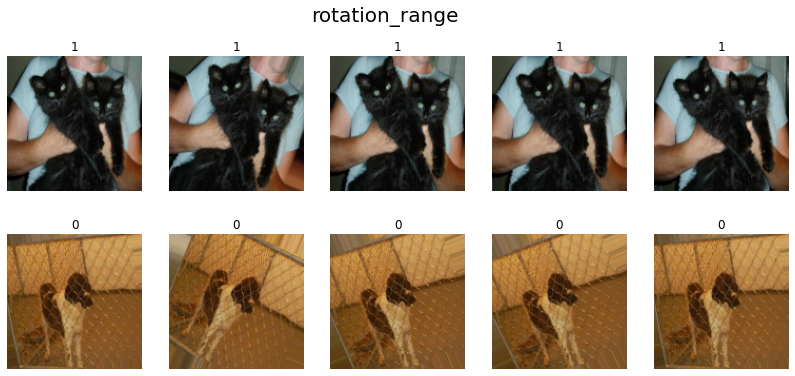

In [27]:
try_augmentation(ImageDataGenerator(
    rotation_range = 25
), title = "rotation_range")

I've decided to go with 25 degrees rotation_range, after trying different values 25 is enough to make the augmented images look different from each other but also not unrealistically rotated.

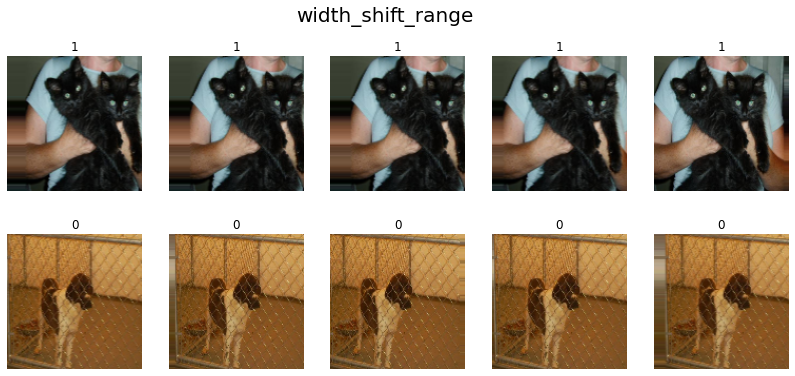

In [28]:
try_augmentation(ImageDataGenerator(
    width_shift_range = .15
), title = "width_shift_range")

I found that anything higher than .15 width_shift_range made the dog/cat be too far off center, in some cases almost smudged up against the side.

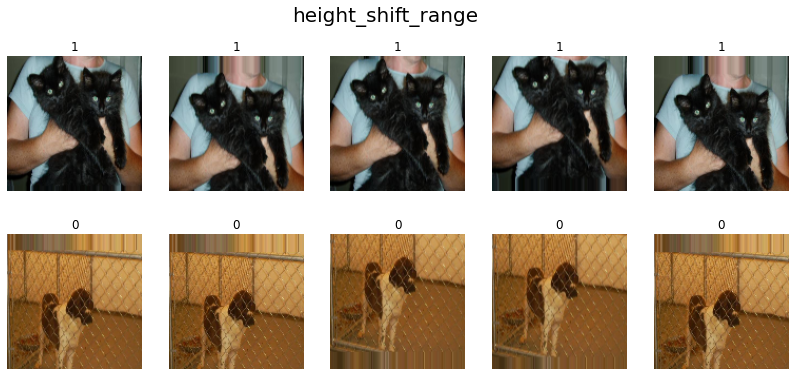

In [29]:
try_augmentation(ImageDataGenerator(
    height_shift_range = .15
), title = "height_shift_range")

.15 height_shift_range ended up being what looked the best, the dog/cat was not too close to the edges.

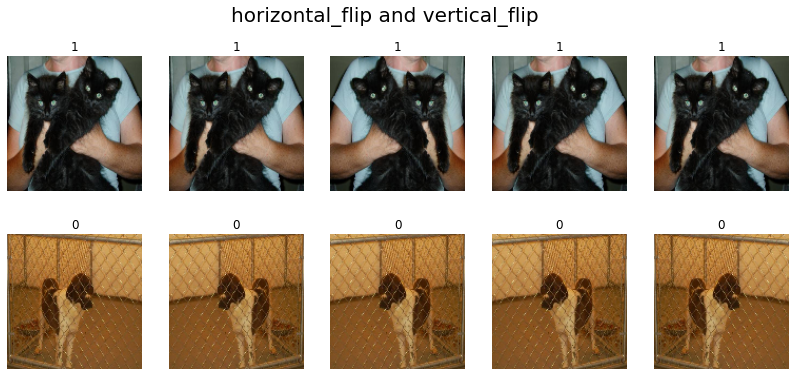

In [30]:
try_augmentation(ImageDataGenerator(
    horizontal_flip = True,
    vertical_flip = False
), title = "horizontal_flip and vertical_flip")

I will use horizontal_flip because there are images from each direction, but I won't be using vertical_flip because in most cases the images won't be upside down.

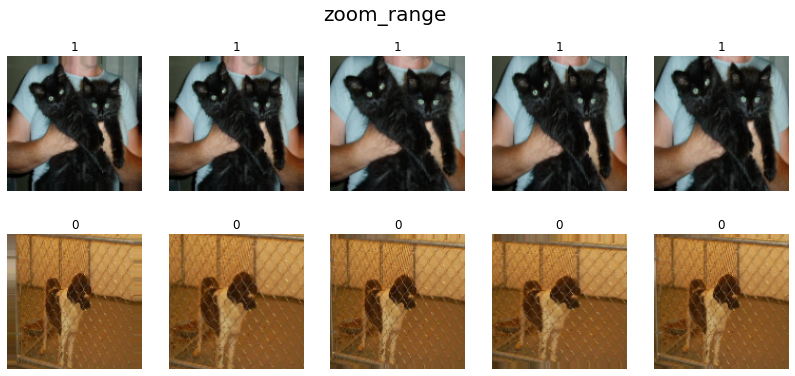

In [31]:
try_augmentation(ImageDataGenerator(
    zoom_range = .15
), title = "zoom_range")

zoom_range over .15 distorted some images too much.

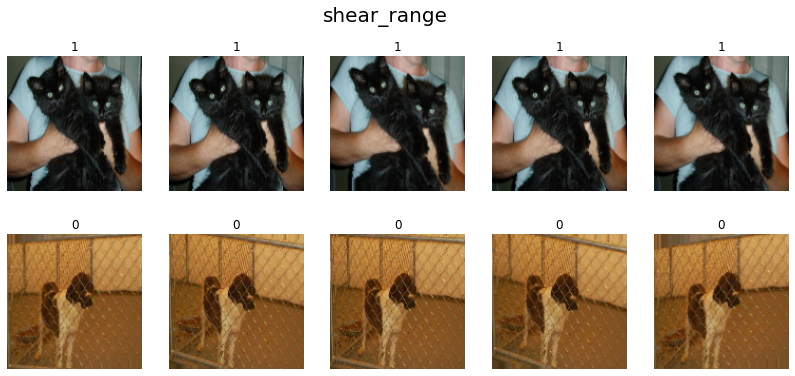

In [32]:
try_augmentation(ImageDataGenerator(
    shear_range = 15
), title = "shear_range")

I find shear_range at 15 degrees to be the best without overly augmenting the images.

In [33]:
final_image_generator = ImageDataGenerator(rotation_range = 25,
                                              width_shift_range = .15,
                                              height_shift_range = .1,
                                              vertical_flip = False,
                                              horizontal_flip = True,
                                              zoom_range = .15,
                                              shear_range = 15)

no_aug_generator = ImageDataGenerator()

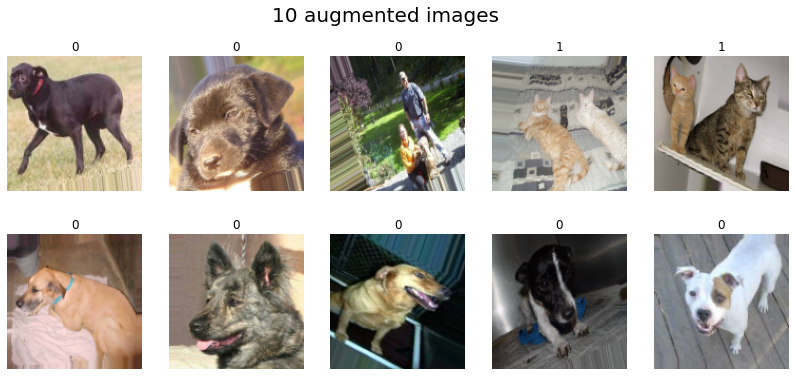

In [34]:
batch_size = 32
test_image_generator = final_image_generator.flow(small_X_train, small_y_train, batch_size = batch_size)

test_batch = test_image_generator.next()
plot_samples(test_batch[0], test_batch[1], title = "10 augmented images")

## 2.Train models (*)
a)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

CNN model

In [36]:
def CNN_model(kernels, dropout_rate, learning_rate):
    model = Sequential(name = "CNN_model")
    adam = Adam(learning_rate)
    
    # convolutional layers
    for number_of_kernels in kernels:
        conv_layer = Conv2D(number_of_kernels, 
                            kernel_size = (3, 3),
                            activation = "relu",
                            kernel_initializer = "he_normal",
                            input_shape = small_X_train.shape[1:])
        model.add(conv_layer)
        model.add(MaxPool2D(pool_size = (2, 2), strides = 2))
    
    # MLP layers
    model.add(Flatten())
    model.add(Dropout(dropout_rate))
    model.add(Dense(512, activation = "relu", kernel_initializer = "he_normal")) # fully connected
    model.add(Dense(1, activation = "sigmoid")) # output

    # compile model
    model.compile(loss = "binary_crossentropy", metrics = ["accuracy"], optimizer = adam)

    return model

In [37]:
def image_generator(X, y, X_val, y_val, augmented = False):
    batch_size = 32
    steps_per_epoch = int(len(X) / batch_size)
    validation_steps = int(len(X_val) / batch_size)
    
    val_generator = no_aug_generator.flow(X_val, y_val, batch_size = batch_size, seed = 42)
    
    if augmented:
        train_generator = final_image_generator.flow(X, y, batch_size = batch_size, seed = 42) 
    else:
        train_generator = no_aug_generator.flow(X, y, batch_size = batch_size, seed = 42)
    
    return train_generator, val_generator, steps_per_epoch, validation_steps

In [38]:
def early_stop(model, train, val, steps_per_epoch, validation_steps):
    # early stopping
    early_stopper = EarlyStopping(monitor = "val_accuracy",
                                  mode = "max",
                                  patience = 5,
                                  restore_best_weights = True)
    
    # fit model
    model.fit(
            train,
            steps_per_epoch = steps_per_epoch,
            epochs = 100,
            callbacks = [early_stopper],
            validation_data = val,
            validation_steps = validation_steps,
            verbose = 0
        )

    return model

Plot loss and accuracy metrics

In [82]:
def plot_metrics(model, title):
     metrics = pd.DataFrame(model.history.history)
     
     # plot
     _, ax = plt.subplots(1, 2, figsize = (12, 4))
     metrics[["loss", "val_loss"]].plot(ax = ax[0], grid = True, title = "loss and val loss", xlabel = "epochs", ylabel = "loss")
     metrics[["accuracy", "val_accuracy"]].plot(ax = ax[1], grid = True, title = "accuracy and val accuracy", xlabel = "epochs", ylabel = " accuracy")
     plt.suptitle(f"Metrics for dataset: {title}")

### Small dataset with no augmentation

In [40]:
# CNN layout from specification
dropout_rate = .3
kernels = [32, 64, 128, 128]

# starting with .0001 learning rate
learning_rate = .0001

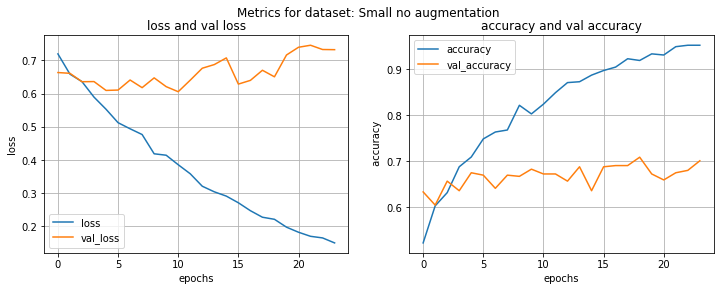

In [85]:
images_small = image_generator(small_X_train, small_y_train, small_X_val, small_y_val)
base_model = CNN_model(kernels, dropout_rate, learning_rate)

base_model_fitted = early_stop(base_model, images_small[0], images_small[1], images_small[2], images_small[3])
plot_metrics(base_model_fitted, "Small no augmentation")

I used early stopping to tune the number of epochs and I will use 7

In [217]:
epochs = 7

In [218]:
# returns validation accuracy
def get_metrics(images, epochs = epochs, **kwargs):
    model = CNN_model(**kwargs)
    
    model.fit(
        images[0],
        steps_per_epoch = images[2],
        epochs = epochs,
        validation_data = images[1],
        validation_steps = images[3],
        verbose = 0
    )
    
    metrics = pd.DataFrame(model.history.history)
    
    return metrics["val_accuracy"].iloc[-1]

In [43]:
def plot_tuning(data, x_label):
    tuning_df = pd.DataFrame(data.values(), index = data.keys())
    tuning_df.plot(xlabel = x_label, ylabel = "Validation  accuracy", style = "--o", legend = False)

In [260]:
def tune_learning_rate(images, learning_rates, kernels = kernels, dropout_rate = dropout_rate, epochs = epochs):
    learning_rate_accuracy = {}
    
    for learning_rate in learning_rates:
        learning_rate_accuracy[learning_rate] = get_metrics(images,
                                                            kernels = kernels, 
                                                            dropout_rate = dropout_rate, 
                                                            learning_rate = learning_rate,
                                                            epochs = epochs)
    plot_tuning(learning_rate_accuracy, "Learning rate")

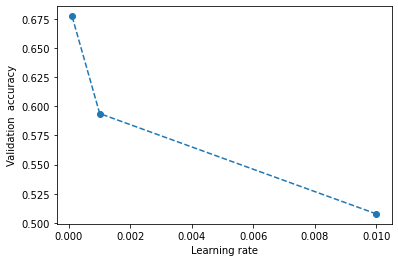

In [215]:
tune_learning_rate(images_small, [.01, .001, .0001])

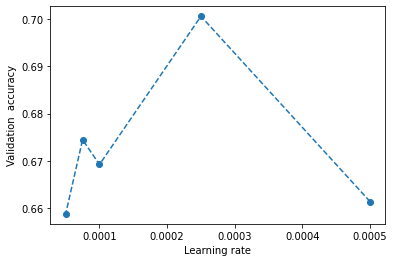

In [227]:
tune_learning_rate(images_small, [.0005, .00025, .0001, .000075, .00005])

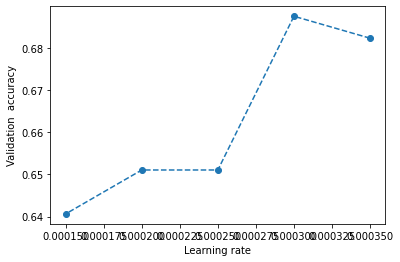

In [228]:
tune_learning_rate(images_small, [.00035, .0003, .00025, .0002, .00015])

To tune the learning rate I started with a big intervall [.01, .001, .0001] and went smaller and smaller until I ended up with a .0003 learning rate.

In [229]:
learning_rate_tuned_small = .0003

In [262]:
def tune_dropout_rate(images, dropout_rates, kernels = kernels, learning_rate = learning_rate, epochs = epochs):
    dropout_rate_accuracy = {}
    
    for dropout in dropout_rates:
        dropout_rate_accuracy[dropout] = get_metrics(images,
                                                     kernels = kernels,
                                                     dropout_rate = dropout, 
                                                     learning_rate = learning_rate,
                                                     epochs = epochs)
    plot_tuning(dropout_rate_accuracy, "Dropout rate")

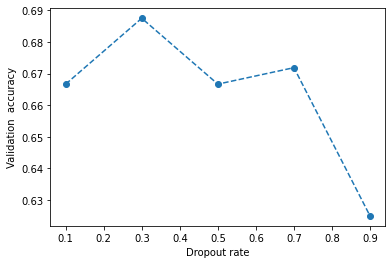

In [232]:
tune_dropout_rate(images_small, [.1, .3, .5, .7, .9], learning_rate = learning_rate_tuned_small)

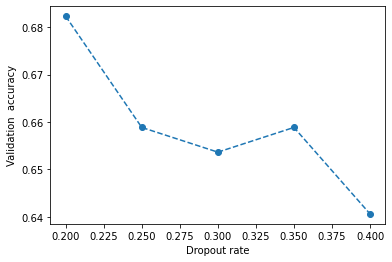

In [233]:
tune_dropout_rate(images_small, [.2, .25, .3, .35, .4], learning_rate = learning_rate_tuned_small)

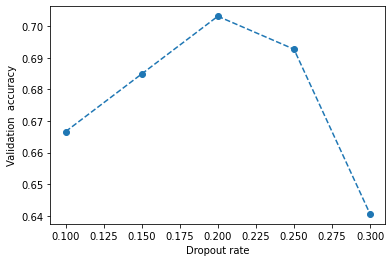

In [235]:
tune_dropout_rate(images_small, [.1, .15, .2, .25, .3], learning_rate = learning_rate_tuned_small)

I went ahead and tuned dropout rate the same way as for learning rate and ended up with a dropout rate of .2

In [236]:
dropout_rate_tuned_small = .2

In [237]:
small_model = CNN_model(kernels = kernels, 
                        dropout_rate = dropout_rate_tuned_small, 
                        learning_rate = learning_rate_tuned_small)

small_model.fit(
        images_small[0],
        steps_per_epoch = images_small[2],
        epochs = 7
)

Epoch 1/7
50/50 [==============================] - 1s 9ms/step - loss: 0.7256 - accuracy: 0.5244
Epoch 2/7
50/50 [==============================] - 0s 9ms/step - loss: 0.6567 - accuracy: 0.6131
Epoch 3/7
50/50 [==============================] - 0s 8ms/step - loss: 0.5986 - accuracy: 0.6756
Epoch 4/7
50/50 [==============================] - 0s 9ms/step - loss: 0.5293 - accuracy: 0.7375
Epoch 5/7
50/50 [==============================] - 0s 9ms/step - loss: 0.4620 - accuracy: 0.7800
Epoch 6/7
50/50 [==============================] - 0s 9ms/step - loss: 0.3834 - accuracy: 0.8288
Epoch 7/7
50/50 [==============================] - 0s 8ms/step - loss: 0.3244 - accuracy: 0.8637


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

In [373]:
def evaluate_model(model, X, y):
    y_pred = model.predict(X)
    y_pred = np.round(y_pred)
    
    print(classification_report(y, y_pred))
    
    cm = confusion_matrix(y, y_pred)
    ConfusionMatrixDisplay(cm, display_labels = ["Dog", "Cat"]).plot()

              precision    recall  f1-score   support

           0       0.73      0.53      0.61       200
           1       0.63      0.81      0.71       200

    accuracy                           0.67       400
   macro avg       0.68      0.67      0.66       400
weighted avg       0.68      0.67      0.66       400



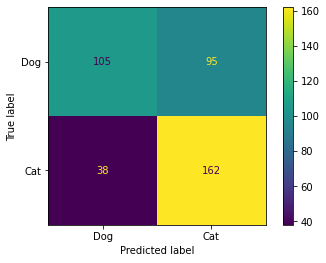

In [374]:
evaluate_model(small_model, small_X_val, small_y_val)

I try and change the kernels from [32, 64, 128, 128] to [16, 32, 64] too see how the network works with fewer kernels, I will also try [64, 128, 256, 512] to see how it works with more and larger kernels.

[16, 32, 64] kernels

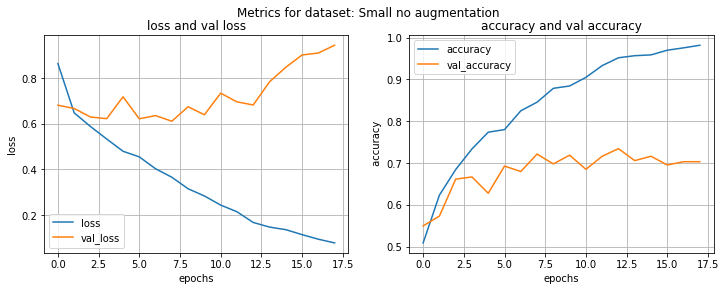

In [239]:
small_model_few_kernels = CNN_model(kernels = [16, 32, 64], 
                                    dropout_rate = dropout_rate_tuned_small,
                                    learning_rate = learning_rate_tuned_small)

plot_metrics(early_stop(small_model_few_kernels, images_small[0], images_small[1], images_small[2], images_small[3]), "Small no augmentation")

Epoch 1/5
50/50 [==============================] - 1s 6ms/step - loss: 0.0022 - accuracy: 1.0000
Epoch 2/5
50/50 [==============================] - 0s 6ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 3/5
50/50 [==============================] - 0s 6ms/step - loss: 0.0157 - accuracy: 0.9950
Epoch 4/5
50/50 [==============================] - 0s 6ms/step - loss: 0.0146 - accuracy: 0.9950
Epoch 5/5
50/50 [==============================] - 0s 6ms/step - loss: 0.0386 - accuracy: 0.9912
              precision    recall  f1-score   support

           0       0.74      0.69      0.72       200
           1       0.71      0.76      0.73       200

    accuracy                           0.73       400
   macro avg       0.73      0.72      0.72       400
weighted avg       0.73      0.72      0.72       400



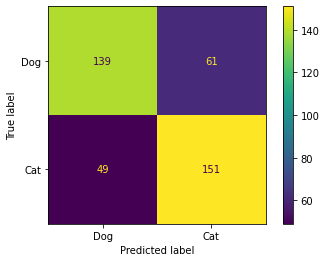

In [375]:
small_model_few_kernels.fit(
        images_small[0],
        steps_per_epoch = images_small[2],
        epochs = 5
)

evaluate_model(small_model_few_kernels, small_X_val, small_y_val)

[64, 128, 256, 512] kernels

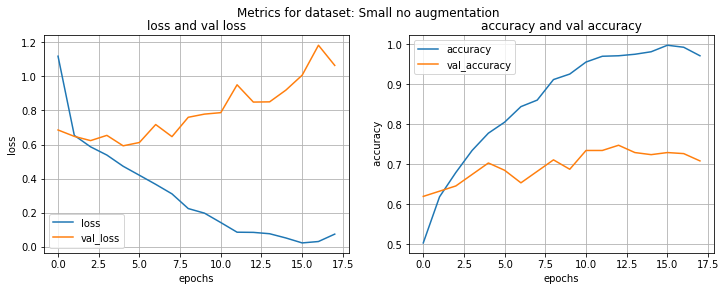

In [247]:
small_model_large_kernels = CNN_model(kernels = [64, 128, 256, 512], 
                                    dropout_rate = dropout_rate_tuned_small,
                                    learning_rate = learning_rate_tuned_small)

plot_metrics(early_stop(small_model_large_kernels, images_small[0], images_small[1], images_small[2], images_small[3]), "Small no augmentation")

Epoch 1/4
50/50 [==============================] - 1s 19ms/step - loss: 0.4252 - accuracy: 0.8037
Epoch 2/4
50/50 [==============================] - 1s 16ms/step - loss: 0.1280 - accuracy: 0.9563
Epoch 3/4
50/50 [==============================] - 1s 16ms/step - loss: 0.0509 - accuracy: 0.9869
Epoch 4/4
50/50 [==============================] - 1s 16ms/step - loss: 0.0654 - accuracy: 0.9731
              precision    recall  f1-score   support

           0       0.76      0.65      0.70       200
           1       0.69      0.80      0.74       200

    accuracy                           0.72       400
   macro avg       0.73      0.72      0.72       400
weighted avg       0.73      0.72      0.72       400



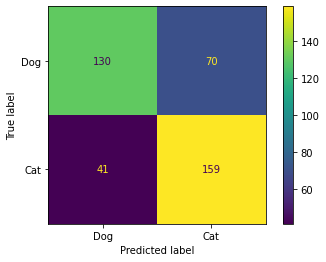

In [376]:
small_model_large_kernels.fit(
        images_small[0],
        steps_per_epoch = images_small[2],
        epochs = 4,
)

evaluate_model(small_model_large_kernels, small_X_val, small_y_val)

I got the best result with kernels = [64, 128, 256, 512]

### Small dataset with augmentation

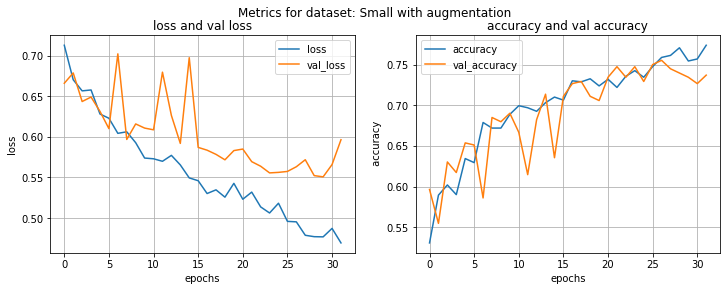

In [277]:
images_small_aug = image_generator(small_X_train, small_y_train, small_X_val, small_y_val, augmented = True)
base_model_aug = CNN_model(kernels, dropout_rate, learning_rate)

base_model_aug_fitted = early_stop(base_model_aug, images_small_aug[0], images_small_aug[1], images_small_aug[2], images_small_aug[3])
plot_metrics(base_model_aug_fitted, "Small with augmentation")

I will use 24 epochs

In [280]:
epochs = 24

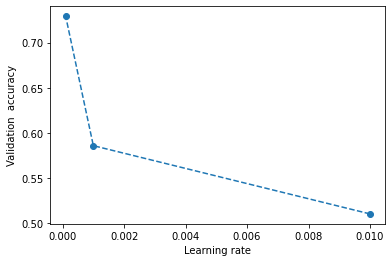

In [279]:
tune_learning_rate(images_small_aug, [.01, .001, .0001], epochs = epochs)

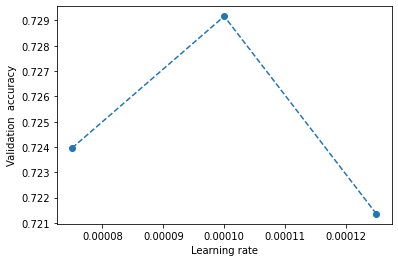

In [281]:
tune_learning_rate(images_small_aug, [.000125, .0001, .000075], epochs = epochs)

I will go with .0001 learning rate

In [282]:
learning_rate_tuned_small_aug = .0001

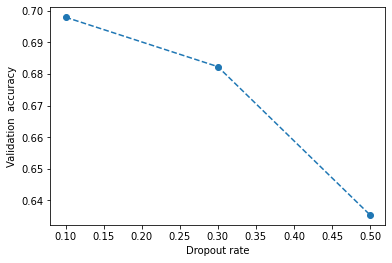

In [283]:
tune_dropout_rate(images_small_aug, [.1, .3, .5], learning_rate = learning_rate_tuned_small_aug)

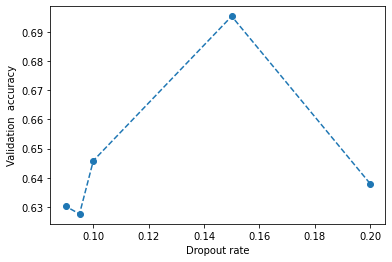

In [286]:
tune_dropout_rate(images_small_aug, [.2, .15, .1, .095, 0.09], learning_rate = learning_rate_tuned_small_aug)

After tuning the dropout rate I will set it to .15

In [289]:
dropout_rate_tuned_small_aug = .15

In [291]:
small_model_aug = CNN_model(kernels = kernels, 
                        dropout_rate = dropout_rate_tuned_small_aug, 
                        learning_rate = learning_rate_tuned_small_aug)

small_model_aug.fit(
        images_small_aug[0],
        steps_per_epoch = images_small_aug[2],
        epochs = 25,
        verbose = 0
)

              precision    recall  f1-score   support

           0       0.70      0.77      0.73       200
           1       0.74      0.67      0.70       200

    accuracy                           0.72       400
   macro avg       0.72      0.72      0.72       400
weighted avg       0.72      0.72      0.72       400



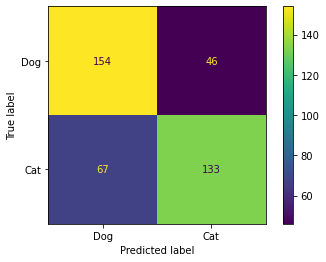

In [377]:
evaluate_model(small_model_aug, small_X_val, small_y_val)

I will try and set the kernels to [16, 32, 64] and [64, 128, 256, 512] with the augmented images and see if the results are the same as for the non-augmented images.

[16, 32, 64] kernels

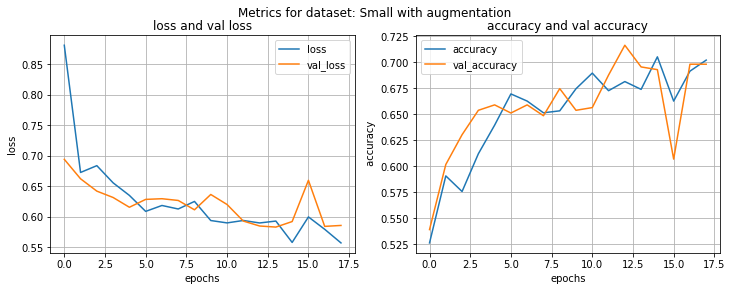

In [299]:
small_model_few_kernels_aug = CNN_model(kernels = [16, 32, 64], 
                                    dropout_rate = dropout_rate_tuned_small_aug,
                                    learning_rate = learning_rate_tuned_small_aug)

plot_metrics(early_stop(small_model_few_kernels_aug, images_small_aug[0], images_small_aug[1], images_small_aug[2], images_small_aug[3]), "Small with augmentation")

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       200
           1       0.74      0.69      0.71       200

    accuracy                           0.73       400
   macro avg       0.73      0.73      0.72       400
weighted avg       0.73      0.72      0.72       400



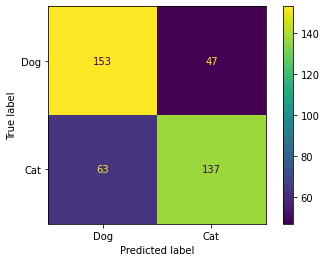

In [378]:
small_model_few_kernels_aug.fit(
        images_small_aug[0],
        steps_per_epoch = images_small_aug[2],
        epochs = 12,
        verbose = 0,
)

evaluate_model(small_model_few_kernels_aug, small_X_val, small_y_val)

[64, 128, 256, 512] kernels

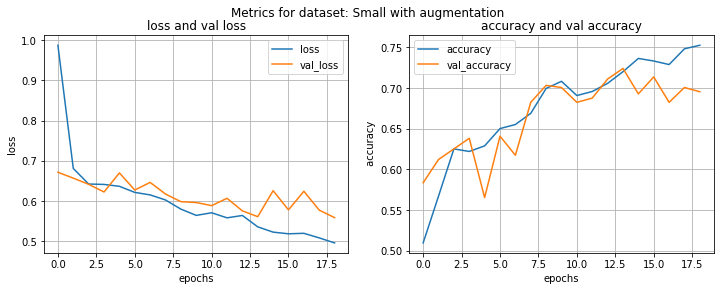

In [302]:
small_model_large_kernels_aug = CNN_model(kernels = [64, 128, 256, 512], 
                                    dropout_rate = dropout_rate_tuned_small_aug,
                                    learning_rate = learning_rate_tuned_small_aug)

plot_metrics(early_stop(small_model_large_kernels_aug, images_small_aug[0], images_small_aug[1], images_small_aug[2], images_small_aug[3]), "Small with augmentation")

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       200
           1       0.76      0.77      0.76       200

    accuracy                           0.76       400
   macro avg       0.76      0.76      0.76       400
weighted avg       0.76      0.76      0.76       400



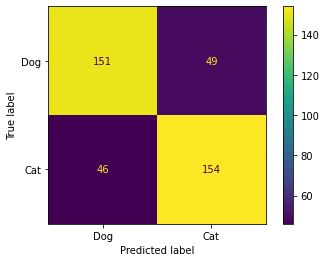

In [379]:
small_model_large_kernels_aug.fit(
        images_small_aug[0],
        steps_per_epoch = images_small_aug[2],
        epochs = 12,
        verbose = 0,
)

evaluate_model(small_model_large_kernels_aug, small_X_val, small_y_val)

### Tuning final model with small dataset

Trying the previous tuned learning rate +- 10%.

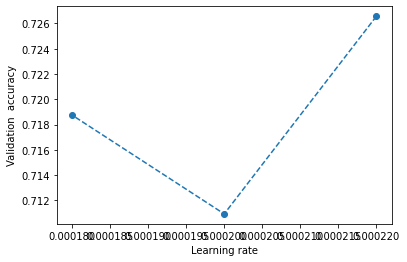

In [339]:
tune_learning_rate(images_small, learning_rates = [(learning_rate_tuned_small * 1.1), learning_rate_tuned_small, (learning_rate_tuned_small * 0.9)], kernels = [64, 128, 256, 512], dropout_rate = dropout_rate_tuned_small, epochs = 12)

In [341]:
learning_rate_tuned_small * 1.1

0.00022000000000000003

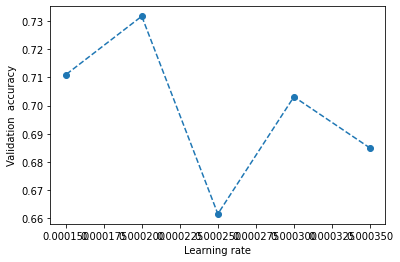

In [342]:
tune_learning_rate(images_small, learning_rates = [.00035, .0003, .00025, .0002, .00015], kernels = [64, 128, 256, 512], dropout_rate = dropout_rate_tuned_small, epochs = 12)

In [348]:
tune_learning_rate(images_small, learning_rates = [.00024, .00022, .0002, .00018], kernels = [64, 128, 256, 512], dropout_rate = dropout_rate_tuned_small, epochs = 12)

Final learning rate tuned to .0002

In [319]:
learning_rate_tuned_small_final = .0002

In [349]:
tune_dropout_rate(images_small, dropout_rates = [.1, .2, .3, .4],  kernels = [64, 128, 256, 512], learning_rate = learning_rate_tuned_small_final, epochs = 12)

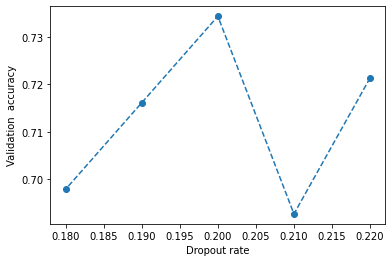

In [351]:
tune_dropout_rate(images_small, dropout_rates = [.22, .21, .2, .19, .18],  kernels = [64, 128, 256, 512], learning_rate = learning_rate_tuned_small_final, epochs = 12)

Final dropout rate tuned to .2

In [352]:
dropout_rate_tuned_small_final = .2

Final model for the small dataset

In [522]:
small_X_train_final = np.concatenate([small_X_train, small_X_val], axis=0)
small_y_train_final = np.concatenate([small_y_train, small_y_val], axis=0)

small_train_generator = no_aug_generator.flow(small_X_train_final, small_y_train_final)
small_steps_per_epoch = int(len(small_X_train_final) / 32)

In [354]:
model_small_final = CNN_model(kernels = [64, 128, 256, 512],
                              dropout_rate = dropout_rate_tuned_small_final,
                              learning_rate = learning_rate_tuned_small_final)

model_small_final.fit(
    small_train_generator,
    steps_per_epoch = small_steps_per_epoch,
    epochs = 12
)

Epoch 1/12
87/87 [==============================] - 2s 18ms/step - loss: 0.8838 - accuracy: 0.5452
Epoch 2/12
87/87 [==============================] - 1s 16ms/step - loss: 0.5990 - accuracy: 0.6694
Epoch 3/12
87/87 [==============================] - 1s 16ms/step - loss: 0.5180 - accuracy: 0.7493
Epoch 4/12
87/87 [==============================] - 1s 16ms/step - loss: 0.4307 - accuracy: 0.8002
Epoch 5/12
87/87 [==============================] - 1s 16ms/step - loss: 0.3468 - accuracy: 0.8504
Epoch 6/12
87/87 [==============================] - 1s 16ms/step - loss: 0.2565 - accuracy: 0.8941
Epoch 7/12
87/87 [==============================] - 1s 16ms/step - loss: 0.2136 - accuracy: 0.9086
Epoch 8/12
87/87 [==============================] - 1s 16ms/step - loss: 0.1461 - accuracy: 0.9476
Epoch 9/12
87/87 [==============================] - 1s 16ms/step - loss: 0.1119 - accuracy: 0.9574
Epoch 10/12
87/87 [==============================] - 1s 16ms/step - loss: 0.0937 - accuracy: 0.9675
Epoch 11/

              precision    recall  f1-score   support

           0       0.70      0.86      0.77       250
           1       0.81      0.63      0.71       250

    accuracy                           0.74       500
   macro avg       0.76      0.74      0.74       500
weighted avg       0.76      0.74      0.74       500



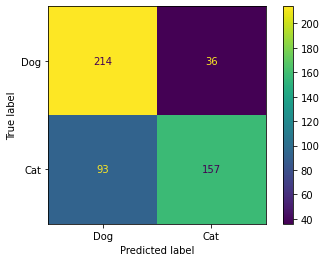

In [380]:
evaluate_model(model_small_final, small_X_test, small_y_test)

### Tiny dataset no augmentation

In [359]:
# CNN layout from specification
dropout_rate = .3
kernels = [32, 64, 128, 128]

# starting with .0001 learning rate
learning_rate = .0001

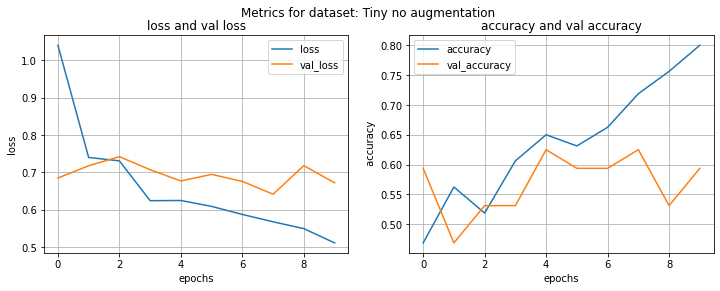

In [360]:
images_tiny = image_generator(tiny_X_train, tiny_y_train, tiny_X_val, tiny_y_val)
base_model_tiny = CNN_model(kernels, dropout_rate, learning_rate)

plot_metrics(early_stop(base_model_tiny, images_tiny[0], images_tiny[1], images_tiny[2], images_tiny[3]), "Tiny no augmentation")

From early stopping I can see that I will use 5 epochs

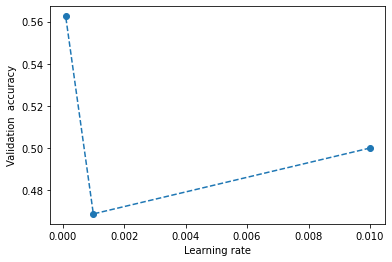

In [428]:
tune_learning_rate(images_tiny, [.01, .001, .0001], epochs = 5)

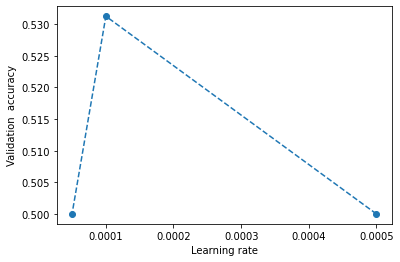

In [429]:
tune_learning_rate(images_tiny, [.0005, .0001, .00005], epochs = 5)

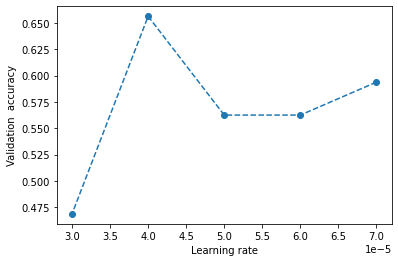

In [430]:
tune_learning_rate(images_tiny, [.00007, .00006, .00005, .00004, .00003], epochs = 5)

Learning rate tuned to .00006

In [431]:
learning_rate_tuned_tiny = .00006

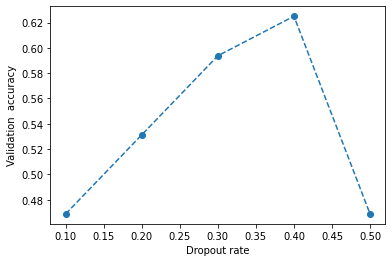

In [432]:
tune_dropout_rate(images_tiny, [.1, .2, .3, .4, .5], epochs = 5, learning_rate = learning_rate_tuned_tiny)

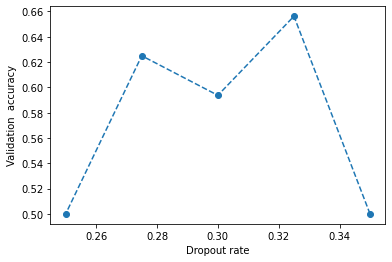

In [433]:
tune_dropout_rate(images_tiny, [.35, .325, .3, .275, .25], epochs = 5, learning_rate = learning_rate_tuned_tiny)

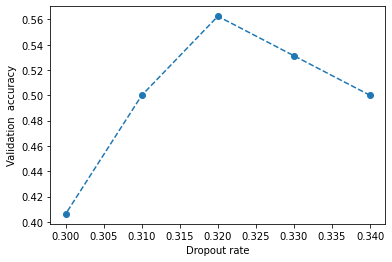

In [435]:
tune_dropout_rate(images_tiny, [.34, .33, .32, .31, .3], epochs = 5, learning_rate = learning_rate_tuned_tiny)

Dropout rate tuned to .32

In [436]:
dropout_rate_tuned_tiny = .32

In [437]:
tiny_model = CNN_model(kernels = kernels, 
                        dropout_rate = dropout_rate_tuned_tiny, 
                        learning_rate = learning_rate_tuned_tiny)

tiny_model.fit(
        images_tiny[0],
        steps_per_epoch = images_tiny[2],
        epochs = 5
)

Epoch 1/5
5/5 [==============================] - 1s 9ms/step - loss: 0.8526 - accuracy: 0.4938
Epoch 2/5
5/5 [==============================] - 0s 9ms/step - loss: 0.7606 - accuracy: 0.5437
Epoch 3/5
5/5 [==============================] - 0s 9ms/step - loss: 0.7003 - accuracy: 0.5750
Epoch 4/5
5/5 [==============================] - 0s 9ms/step - loss: 0.6812 - accuracy: 0.5938
Epoch 5/5
5/5 [==============================] - 0s 9ms/step - loss: 0.7208 - accuracy: 0.5250


              precision    recall  f1-score   support

           0       0.54      0.75      0.63        20
           1       0.58      0.35      0.44        20

    accuracy                           0.55        40
   macro avg       0.56      0.55      0.53        40
weighted avg       0.56      0.55      0.53        40



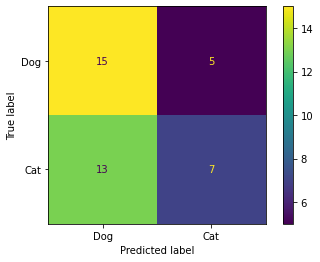

In [438]:
evaluate_model(tiny_model, tiny_X_val, tiny_y_val)

[16, 32, 64] kernels

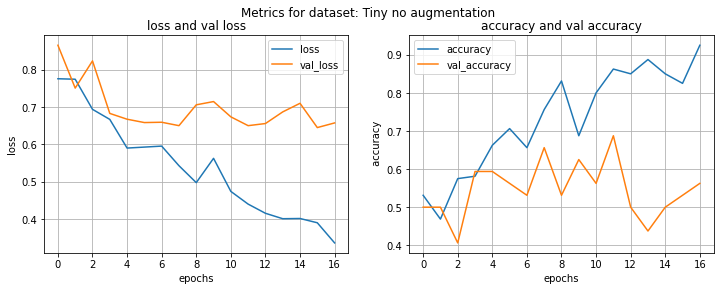

In [440]:
tiny_model_few_kernels = CNN_model(kernels = [16, 32, 64], 
                                    dropout_rate = dropout_rate_tuned_tiny,
                                    learning_rate = learning_rate_tuned_tiny)

plot_metrics(early_stop(tiny_model_few_kernels, images_tiny[0], images_tiny[1], images_tiny[2], images_tiny[3]), "Tiny no augmentation")

              precision    recall  f1-score   support

           0       0.56      0.50      0.53        20
           1       0.55      0.60      0.57        20

    accuracy                           0.55        40
   macro avg       0.55      0.55      0.55        40
weighted avg       0.55      0.55      0.55        40



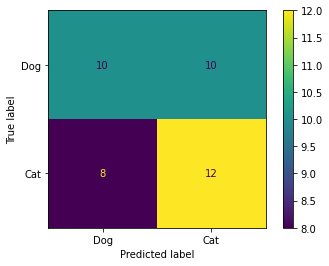

In [441]:
tiny_model_few_kernels.fit(
        images_tiny[0],
        steps_per_epoch = images_tiny[2],
        epochs = 7,
        verbose = 0,
)

evaluate_model(tiny_model_few_kernels, tiny_X_val, tiny_y_val)

[64, 128, 256, 512] kernels

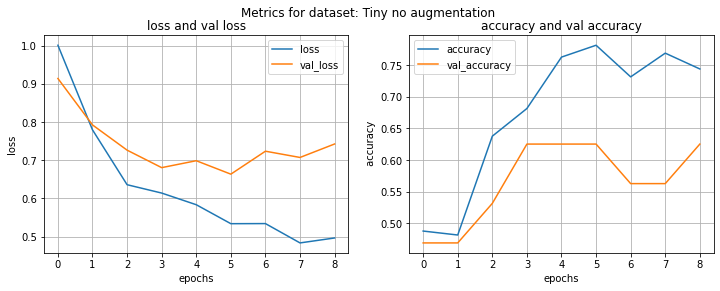

In [442]:
tiny_model_large_kernels = CNN_model(kernels = [64, 128, 256, 512], 
                                    dropout_rate = dropout_rate_tuned_tiny,
                                    learning_rate = learning_rate_tuned_tiny)

plot_metrics(early_stop(tiny_model_large_kernels, images_tiny[0], images_tiny[1], images_tiny[2], images_tiny[3]), "Tiny no augmentation")


              precision    recall  f1-score   support

           0       0.64      0.35      0.45        20
           1       0.55      0.80      0.65        20

    accuracy                           0.57        40
   macro avg       0.59      0.57      0.55        40
weighted avg       0.59      0.57      0.55        40



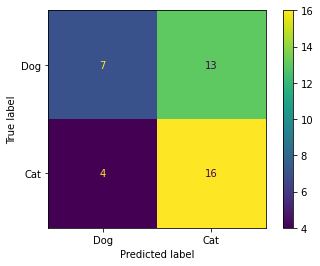

In [443]:
tiny_model_large_kernels.fit(
        images_tiny[0],
        steps_per_epoch = images_tiny[2],
        epochs = 4,
        verbose = 0,
)

evaluate_model(tiny_model_large_kernels, tiny_X_val, tiny_y_val)

The tiny dataset has been more difficult to work with because I can get very different results from running a bit of code over and over. It seems like the model with kernels [64, 128, 256, 512] have the best result on the tiny dataset as well.

### Tiny dataset with augmentation

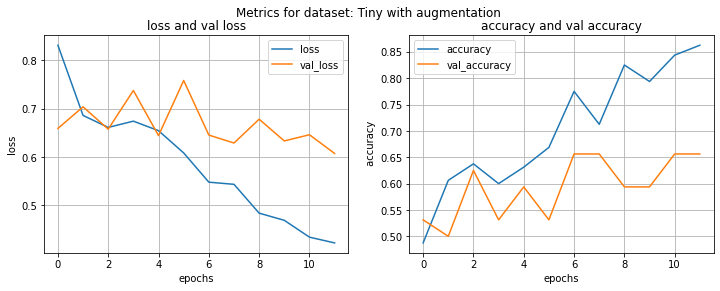

In [452]:
images_tiny_aug = image_generator(tiny_X_train, tiny_y_train, tiny_X_val, tiny_y_val)
base_model_tiny_aug = CNN_model(kernels, dropout_rate, learning_rate)

plot_metrics(early_stop(base_model_tiny_aug, images_tiny_aug[0], images_tiny_aug[1], images_tiny_aug[2], images_tiny_aug[3]), "Tiny with augmentation")

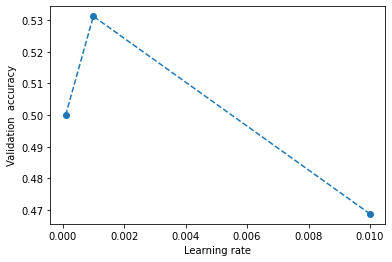

In [453]:
tune_learning_rate(images_tiny_aug, [.01, .001, .0001], epochs = 7)

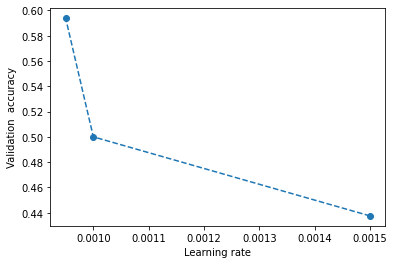

In [454]:
tune_learning_rate(images_tiny_aug, [.0015, .001, .00095], epochs = 7)

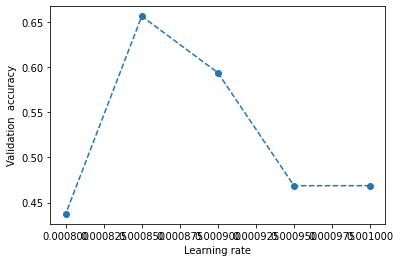

In [455]:
tune_learning_rate(images_tiny_aug, [.001, .00095, .0009, .00085, .0008], epochs = 7)

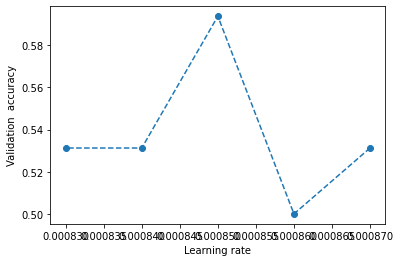

In [457]:
tune_learning_rate(images_tiny_aug, [.00087, .00086, .00085, .00084, .00083], epochs = 7)

In [456]:
learning_rate_tuned_tiny_aug = .00085

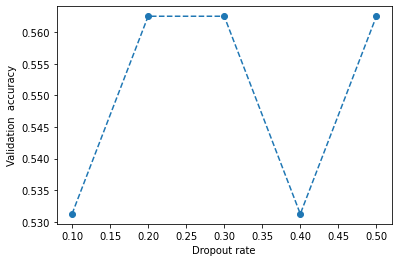

In [466]:
tune_dropout_rate(images_tiny_aug, [.1, .2, .3, .4, .5], epochs = 7, learning_rate = learning_rate_tuned_tiny_aug)

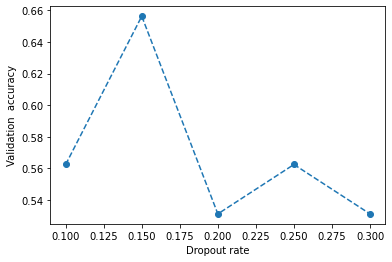

In [469]:
tune_dropout_rate(images_tiny_aug, [.1, .15, .2, .25, .3], epochs = 7, learning_rate = learning_rate_tuned_tiny_aug)

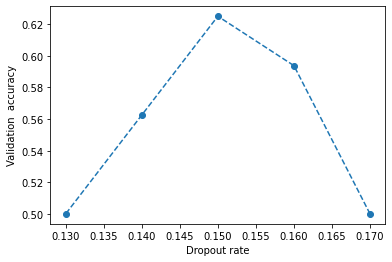

In [470]:
tune_dropout_rate(images_tiny_aug, [.17, .16, .15, .14, .13], epochs = 7, learning_rate = learning_rate_tuned_tiny_aug)

In [471]:
dropout_rate_tuned_tiny_aug = .15

In [474]:
tiny_model_aug = CNN_model(kernels = kernels, 
                           dropout_rate = dropout_rate_tuned_tiny_aug, 
                           learning_rate = learning_rate_tuned_tiny_aug)

tiny_model_aug.fit(
        images_tiny_aug[0],
        steps_per_epoch = images_tiny_aug[2],
        epochs = 7
)

Epoch 1/7
5/5 [==============================] - 1s 9ms/step - loss: 4.0291 - accuracy: 0.4187
Epoch 2/7
5/5 [==============================] - 0s 9ms/step - loss: 0.6868 - accuracy: 0.5437
Epoch 3/7
5/5 [==============================] - 0s 9ms/step - loss: 0.7025 - accuracy: 0.4625
Epoch 4/7
5/5 [==============================] - 0s 9ms/step - loss: 0.6715 - accuracy: 0.6125
Epoch 5/7
5/5 [==============================] - 0s 9ms/step - loss: 0.6638 - accuracy: 0.5688
Epoch 6/7
5/5 [==============================] - 0s 9ms/step - loss: 0.6250 - accuracy: 0.7125
Epoch 7/7
5/5 [==============================] - 0s 9ms/step - loss: 0.5886 - accuracy: 0.7063


              precision    recall  f1-score   support

           0       0.53      0.85      0.65        20
           1       0.62      0.25      0.36        20

    accuracy                           0.55        40
   macro avg       0.58      0.55      0.51        40
weighted avg       0.58      0.55      0.51        40



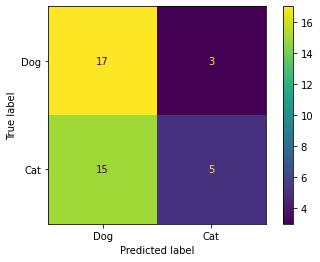

In [476]:
evaluate_model(tiny_model_aug, tiny_X_val, tiny_y_val)

[16, 32, 64] kernels

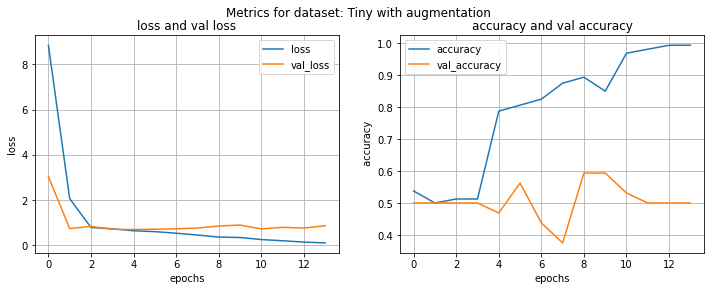

In [483]:
tiny_model_few_kernels_aug = CNN_model(kernels = [16, 32, 64], 
                                    dropout_rate = dropout_rate_tuned_tiny_aug,
                                    learning_rate = learning_rate_tuned_tiny_aug)

plot_metrics(early_stop(tiny_model_few_kernels_aug, images_tiny_aug[0], images_tiny_aug[1], images_tiny_aug[2], images_tiny_aug[3]), "Tiny with augmentation")

              precision    recall  f1-score   support

           0       0.62      0.40      0.48        20
           1       0.56      0.75      0.64        20

    accuracy                           0.57        40
   macro avg       0.59      0.57      0.56        40
weighted avg       0.59      0.57      0.56        40



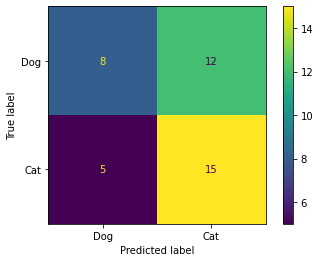

In [484]:
tiny_model_few_kernels_aug.fit(
        images_tiny_aug[0],
        steps_per_epoch = images_tiny_aug[2],
        epochs = 5,
        verbose = 0,
)

evaluate_model(tiny_model_few_kernels_aug, tiny_X_val, tiny_y_val)

[64, 128, 256, 512] kernel

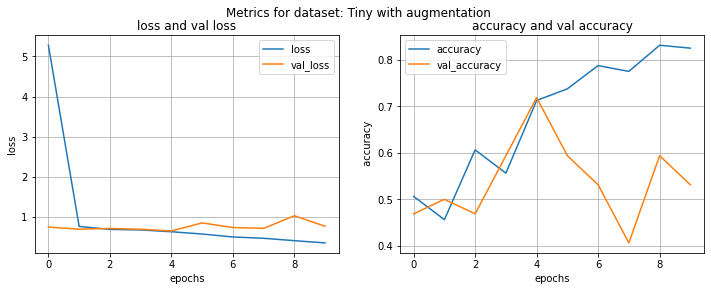

In [490]:
tiny_model_large_kernels_aug = CNN_model(kernels = [64, 128, 256, 512], 
                                    dropout_rate = dropout_rate_tuned_tiny_aug,
                                    learning_rate = learning_rate_tuned_tiny_aug)

plot_metrics(early_stop(tiny_model_large_kernels_aug, images_tiny_aug[0], images_tiny_aug[1], images_tiny_aug[2], images_tiny_aug[3]), "Tiny with augmentation")

              precision    recall  f1-score   support

           0       0.62      0.40      0.48        20
           1       0.56      0.75      0.64        20

    accuracy                           0.57        40
   macro avg       0.59      0.57      0.56        40
weighted avg       0.59      0.57      0.56        40



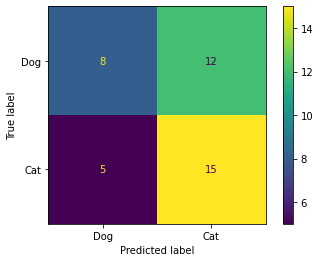

In [491]:
tiny_model_large_kernels_aug.fit(
        images_tiny_aug[0],
        steps_per_epoch = images_tiny_aug[2],
        epochs = 4,
        verbose = 0,
)

evaluate_model(tiny_model_few_kernels_aug, tiny_X_val, tiny_y_val)

### Tuning final model with tiny dataset

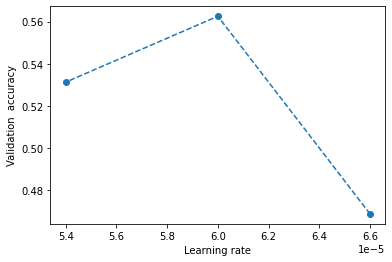

In [512]:
tune_learning_rate(images_tiny, 
                   learning_rates = [(learning_rate_tuned_tiny * 1.1), learning_rate_tuned_tiny, (learning_rate_tuned_tiny * 0.9)], 
                   dropout_rate = dropout_rate_tuned_tiny,
                   kernels = [64, 128, 256, 512],
                   epochs = 4)

In [508]:
learning_rate_tuned_tiny

6e-05

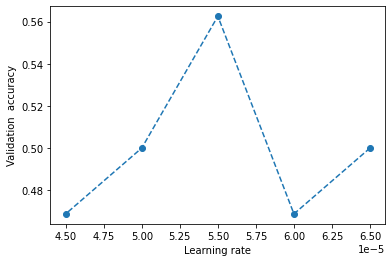

In [516]:
tune_learning_rate(images_tiny, 
                   learning_rates = [.000065, .00006, .000055, .00005, .000045], 
                   dropout_rate = dropout_rate_tuned_tiny,
                   kernels = [64, 128, 256, 512],
                   epochs = 4)

In [517]:
learning_rate_tuned_tiny_final = .000055

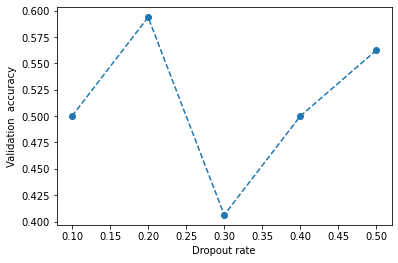

In [518]:
tune_dropout_rate(images_tiny, 
                  dropout_rates = [.1, .2, .3, .4, .5], 
                  kernels = [64, 128, 256, 512],
                  learning_rate = learning_rate_tuned_tiny_final,
                  epochs = 4)

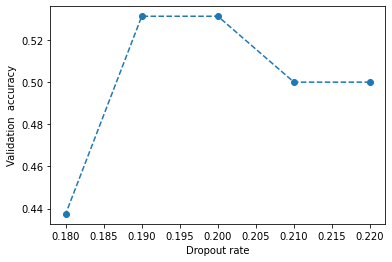

In [520]:
tune_dropout_rate(images_tiny, 
                  dropout_rates = [.22, .21, .2, .19, .18], 
                  kernels = [64, 128, 256, 512],
                  learning_rate = learning_rate_tuned_tiny_final,
                  epochs = 4)

In [521]:
dropout_rate_tuned_tiny_final = .19

Final model for tiny dataset

In [523]:
tiny_X_train_final = np.concatenate([tiny_X_train, tiny_X_val], axis=0)
tiny_y_train_final = np.concatenate([tiny_y_train, tiny_y_val], axis=0)

tiny_train_generator = no_aug_generator.flow(tiny_X_train_final, tiny_y_train_final)
tiny_steps_per_epoch = int(len(tiny_X_train_final) / 32)

In [531]:
model_tiny_final = CNN_model(kernels = [64, 128, 256, 512],
                              dropout_rate = dropout_rate_tuned_tiny_final,
                              learning_rate = learning_rate_tuned_tiny_final)

model_tiny_final.fit(
    tiny_train_generator,
    steps_per_epoch = tiny_steps_per_epoch,
    epochs = 4
)

Epoch 1/4
6/6 [==============================] - 1s 32ms/step - loss: 0.9922 - accuracy: 0.5357
Epoch 2/4
6/6 [==============================] - 0s 17ms/step - loss: 0.7970 - accuracy: 0.5000
Epoch 3/4
6/6 [==============================] - 0s 14ms/step - loss: 0.6500 - accuracy: 0.6190
Epoch 4/4
6/6 [==============================] - 0s 15ms/step - loss: 0.6432 - accuracy: 0.6071


              precision    recall  f1-score   support

           0       0.56      0.36      0.44        25
           1       0.53      0.72      0.61        25

    accuracy                           0.54        50
   macro avg       0.55      0.54      0.52        50
weighted avg       0.55      0.54      0.52        50



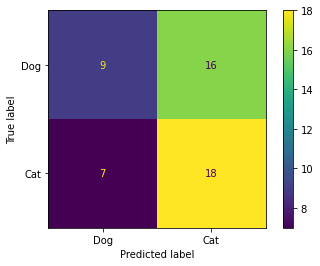

In [532]:
evaluate_model(model_tiny_final, tiny_X_test, tiny_y_test)

The results with the tiny dataset are a lot worse than from the small dataset. The final model trained on the small dataset have decent metrics.

### d) Transfer learning

I’ve chosen to use VGG16 for transfer-learning. 

When they trained the network they used 224 x 224 pixel images that were randomly cropped from resized images.
The network is built by first convolutional layers, the depth differs between 8 and 16 depending on which of the 6 configurations that is used and each convolutional layer filters with 3 x 3. The network have 4 maxpool layers that are 2 x 2 with stride 2 (not too different from what I used in this lab). Thereafter there is three fully connected layers, the first two have 4096 nodes and the third have 1000 nodes. Lastly is the output layer which uses softmax activation function and each hidden layer uses ReLU activation function.

The best performing configuration seems to be "E" which contains 16 convolutional layers 64 x2, 128 x2, 256 x4 and 512 x8.


Transfer learning is used by using a model that is already trained, but on new task. This is used because the performance gianed from using transfer learning is usually a lot higher than traning a model from scratch on a small amout of data. This is accomplished by "cutting" off the end of the already trained model and add your own fully connected layer(s) and an output layer.


In [533]:
from tensorflow.keras.applications import VGG16

In [540]:
transfer_learning_model = VGG16(weights = "imagenet", include_top = False, input_shape = (128, 128, 3))

In [570]:
model = Sequential([
    transfer_learning_model,
    Flatten(),
    Dropout(.5),
    Dense(512, activation = "relu", kernel_initializer = "he_normal"),
    Dropout(.5),
    Dense(1, activation = "sigmoid")
])

# feature extraction
for layer in transfer_learning_model.layers:
    layer.trainable = False
    
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])
    

In [572]:
model.fit(small_train_generator,
          steps_per_epoch = small_steps_per_epoch,
          epochs = 50)

Epoch 1/50
87/87 [==============================] - 2s 20ms/step - loss: 0.2445 - accuracy: 0.9014
Epoch 2/50
87/87 [==============================] - 2s 18ms/step - loss: 0.2083 - accuracy: 0.9158
Epoch 3/50
87/87 [==============================] - 2s 18ms/step - loss: 0.1795 - accuracy: 0.9234
Epoch 4/50
87/87 [==============================] - 2s 18ms/step - loss: 0.1724 - accuracy: 0.9281
Epoch 5/50
87/87 [==============================] - 2s 18ms/step - loss: 0.1571 - accuracy: 0.9324
Epoch 6/50
87/87 [==============================] - 2s 18ms/step - loss: 0.1306 - accuracy: 0.9498
Epoch 7/50
87/87 [==============================] - 2s 18ms/step - loss: 0.1452 - accuracy: 0.9393
Epoch 8/50
87/87 [==============================] - 2s 18ms/step - loss: 0.1172 - accuracy: 0.9541
Epoch 9/50
87/87 [==============================] - 2s 18ms/step - loss: 0.1214 - accuracy: 0.9534
Epoch 10/50
87/87 [==============================] - 2s 18ms/step - loss: 0.1212 - accuracy: 0.9577
Epoch 11/

              precision    recall  f1-score   support

           0       0.85      0.85      0.85       250
           1       0.85      0.86      0.85       250

    accuracy                           0.85       500
   macro avg       0.85      0.85      0.85       500
weighted avg       0.85      0.85      0.85       500



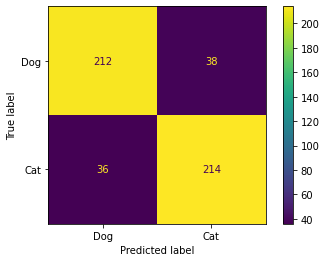

In [573]:
evaluate_model(model, small_X_test, small_y_test)

Here we can see that even without much hyperparameter tuning the results are already much better than for the model I built and tuned earlier. It's obvious to me that if you are in a situation where you don't have enough data, transfer learning seems to be a very useful tool.